# Growth Rates and BCG Charts

### Introduction

In this lesson, we'll see another way to get an overview of our data, which is to look at growth rates of our data.

### Loading our Data

We can begin by loading our data which will come from the [video game sales data](https://www.kaggle.com/datasets/gregorut/videogamesales).

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/analytics-engineering-jigsaw/data-visualization/main/2-storytelling/1-what-to-focus-on/vgsales.csv"
game_sales = pd.read_csv(url)

In [7]:
game_sales[:3]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


And then, we'll go back to selecting just our more recent data, where we have a significant number of datapoints.  Generally *significant* is more than 100 rows od data.

In [8]:
selected_df = game_sales[(game_sales['Year'] < 2017) & (game_sales['Year'] > 2011)]

And we decided that `Global_sales` would be our initial target.

### Looking at raw numbers

So previously, we got an overview of our data by looking at raw numbers.  And we did so simply by grouping our data by different categories, and plotting.

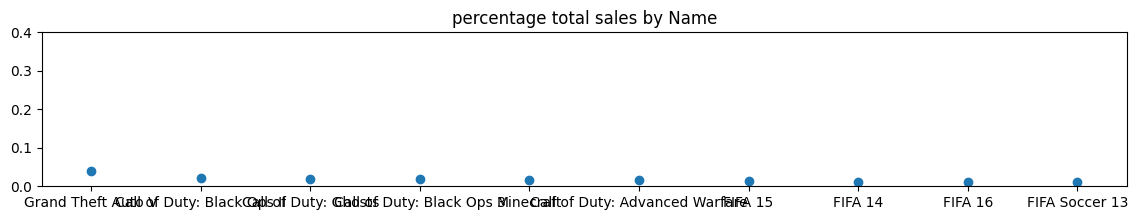

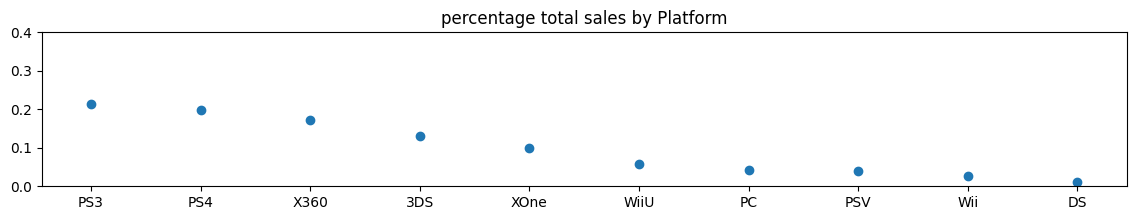

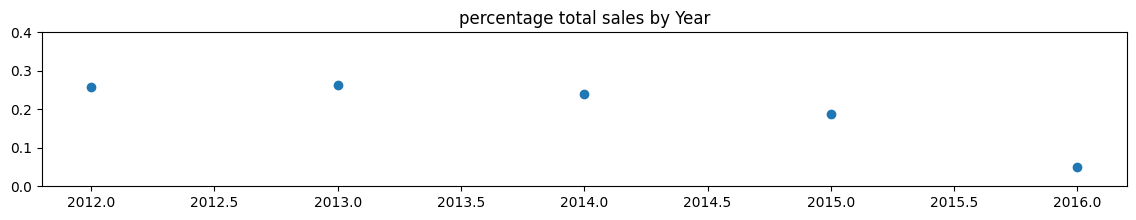

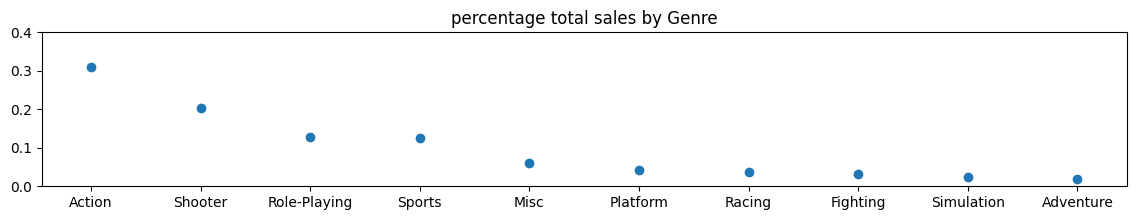

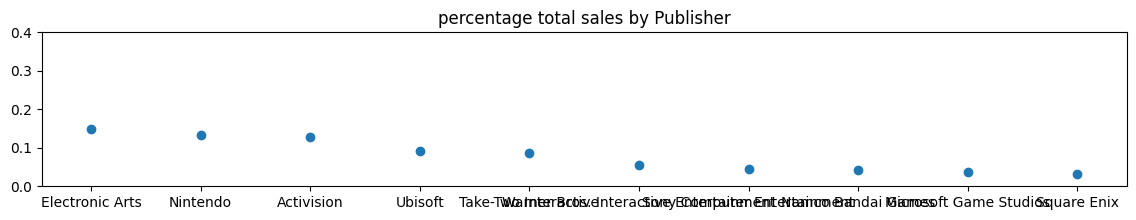

In [9]:
from item_lib import *

cols = ['Name', 'Platform', 'Year', 'Genre', 'Publisher']
target = 'Global_Sales'
agg_name = 'percentage total sales'

results = build_and_print(selected_df, cols, target, agg = 'sum', agg_name = agg_name, y_range=[0, .4])

And from there, we dug deeper by (1) breaking our data down across multiple categories and (2) just selecting action and shooter games and viewing then plotting a breakdown of them.  

### Back to our overview - Comparing Growth Rates

So we focused on action and shooter games because they dominated sales.  But we may also want to see what's coming, and that means looking at growth rates.  To look at growth rates, we'll need repeated information over years.

For example, if we had sales of the *same* video game over different years, we could calculate the growth rate in sales of that game.  But we don't have that.  Instead, we have total sales since the year the game was released.  

In [10]:
selected_df[:3]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35


So to get repeated information, we can look at the growth of different genres over years (of release).  And we can do this by grouping by the genre and year.

In [11]:
target = 'Global_Sales'
agg_name = 'percentage total sales'
cols = ['Genre', 'Year']

grouped_data = selected_df.groupby(cols)[target].agg(['sum'])
grouped_data[:10]

sum
Genre     Year          
Action    2012.0  122.04
          2013.0  125.22
          2014.0   99.02
          2015.0   70.70
          2016.0   19.91
Adventure 2012.0    5.99
          2013.0    6.61
          2014.0    6.06
          2015.0    8.03
          2016.0    1.81

And now we can look at change from year to year, by using the `pct_change` function.

In [12]:
data_pct_change = grouped_data.pct_change()
data_pct_change[:10]

sum
Genre     Year            
Action    2012.0       NaN
          2013.0  0.026057
          2014.0 -0.209232
          2015.0 -0.286003
          2016.0 -0.718388
Adventure 2012.0 -0.699146
          2013.0  0.103506
          2014.0 -0.083207
          2015.0  0.325083
          2016.0 -0.774595

The `pct_change` function just compares the percent change from the previous row.  If we want to see the growth rate over a couple of years, we can ask it to compare against two rows back.

In [43]:
data_pct_change_over_two_years = selected_df.groupby(cols)[target].agg(['sum']).pct_change(periods = 2)
data_pct_change_over_two_years[:10]

sum
Genre     Year            
Action    2012.0       NaN
          2013.0       NaN
          2014.0 -0.188627
          2015.0 -0.435394
          2016.0 -0.798930
Adventure 2012.0 -0.915276
          2013.0 -0.668006
          2014.0  0.011686
          2015.0  0.214826
          2016.0 -0.701320

> So above, we are comparing 2014 vs 2012.

But one issue is that looking at the data above -- *Adventure* 2012 will be compared against *Action* 2015.

So we can just select a middle year so that we are always comparing the growth rate within the same genre.

> Below we select the growth rate of 2014 vs 2012.

In [30]:
filtered_data = data_pct_change.loc[pd.IndexSlice[:, 2014], :]
filtered_data[:3]

,,sum
Genre,Year,
Action,2014.0,-0.209232
Adventure,2014.0,-0.083207
Fighting,2014.0,1.239945


And then we can sort by that growth rate.

In [31]:
pct_change_df = filtered_data.sort_values('sum', ascending = False).rename(columns = {'sum': 'pct_change_sales'})
pct_change_df

,,pct_change_sales
Genre,Year,
Fighting,2014.0,1.239945
Puzzle,2014.0,0.515152
Racing,2014.0,0.279908
Sports,2014.0,0.122984
Shooter,2014.0,0.050955
Role-Playing,2014.0,0.020926
Misc,2014.0,-0.076803
Adventure,2014.0,-0.083207
Action,2014.0,-0.209232


So this is pretty interesting -- fighting games games grew a lot, as did puzzle and racing games.

### Building a BCG Chart

A BCG chart is a pretty classic chart in the world of data analytics.  The idea is that we want to look at both the current performance, as well as the growth rate.

If a genre has large amount of sales, and a high growth rate, they are a star.  And if they have high growth but low current sales, they may be a star in the future.

So above we have the growth rate for 2014, now let's just get sales by genre for 2014.

In [32]:
total_2014 = selected_df[(selected_df['Year'] == 2014)].groupby(cols)[target].agg(['sum']).rename(columns = {'sum': 'total'})
total_2014[:5]

,,total
Genre,Year,
Action,2014.0,99.02
Adventure,2014.0,6.06
Fighting,2014.0,16.15
Misc,2014.0,23.68
Platform,2014.0,8.89


Then we can line up the growth rate and sales on the genre.

In [33]:
merged_df = pd.merge(total_2014, pct_change_df, on='Genre', how='outer')
merged_df

,total,pct_change_sales
Genre,,
Action,99.02,-0.209232
Adventure,6.06,-0.083207
Fighting,16.15,1.239945
Misc,23.68,-0.076803
Platform,8.89,-0.646099
Puzzle,1.50,0.515152
Racing,16.69,0.279908
Role-Playing,45.86,0.020926
Shooter,66.00,0.050955


And let's move genre from an index to also be a column.

In [36]:
genre_sales_df = merged_df.reset_index()
genre_sales_df[:3]

,Genre,total,pct_change_sales
0,Action,99.02,-0.209232
1,Adventure,6.06,-0.083207
2,Fighting,16.15,1.239945


And finally, we can plot the total sales along the x axis, and the growth rate along the y axis.

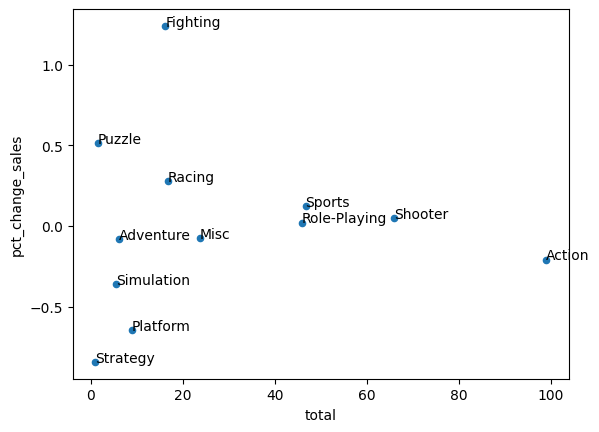

In [38]:
import matplotlib.pyplot as plt

# Plot scatter plot
ax = genre_sales_df.plot.scatter(x='total', y='pct_change_sales')

# Add labels to the data points
for i, row in genre_sales_df.iterrows():
    ax.text(row['total'], row['pct_change_sales'], row['Genre'])

So now we can view our different genres across both axes -- the amount of total sales is on the x axis and the percent change in sales in the y axis.  

And we can divide our grid into different quadrants.

<img src="./bcg-chart.png" width="60%">

* Stars (top right): have both high growth rate and has current sales
* Cash cows (bottom right): Have high sales but have plateaued (eg. Action)
* Question Mark: (top left): High growth rate, but low sales
* Pets: Low growth rates and low sales

A BCG chart is nice way to view categories, when we are trying to optimize across two metrics.  Note that we could choose *various* metrics to be plotted against our X and Y axis.

For example, maybe 
* it's low cost and high quality 
* Companies with high salaries and benefits

Either way, the strategy is the same -- find two metrics to plot our categories against, and focus on a specific quadrant where both are satisfied.

### Summary

So in this lesson, we saw another way to get an overview, which is to look at the growth rates.  We saw that we first need repeating data over different time periods -- so to accomplish this we grouped our data by genre and year to then look at the growth rate of different genres.

In [ ]:
target = 'Global_Sales'
agg_name = 'percentage total sales'
cols = ['Genre', 'Year']

grouped_data = selected_df.groupby(cols)[target].agg(['sum'])
grouped_data[:10]

From there, we looked calculated the percentage change, and selected the percentage change of a specific year.

In [58]:
data_pct_change_over_two_years = selected_df.groupby(cols)[target].agg(['sum']).pct_change(periods = 2)

In [59]:
filtered_data = data_pct_change.loc[pd.IndexSlice[:, 2014], :]

We then merged this with our total sales by genre for that same year.  Then added the genre as a column.

In [39]:
merged_df = pd.merge(total_2014, pct_change_df, on='Genre', how='outer')
merged_with_col = merged_df.reset_index()

And finally plotted our data.

In [42]:
import matplotlib.pyplot as plt

# Plot scatter plot
ax = merged_with_col.plot.scatter(x='total', y='pct_change_sales')

# Add labels to the data points
for i, row in merged_with_col.iterrows():
    ax.text(row['total'], row['pct_change_sales'], row['Genre'])

### Resources

[Supermarket Sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

[Ecommerce Behavior](https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store)